In [3]:
# function to traverse the Fleurs dataset

import os
import matplotlib.pyplot as plt
import re
import subprocess


def traverse_fleurs(skip_Hungarian=False):
    fleurs_dataset_dirs = ["be_by", "de_de", "en_us", "fr_fr", "gl_es", "hr_hr", "hu_hu", "it_it", "pl_pl", "ru_ru", "uk_ua"]
    results = {}
    eval_script = "/home/kozi/Documents/NeMo/examples/asr/speech_to_text_eval.py"
    params = "use_cer=True only_score_manifest=True"

    for subdir_string in fleurs_dataset_dirs:
        if skip_Hungarian and subdir_string == "hu_hu":
            continue

        subdir = os.path.join("/home/kozi/Documents/fleurs", subdir_string)
        for file in os.listdir(subdir):
            if file.startswith("fastconformer") and file.endswith(".json"):
                file = os.path.join(subdir, file)
                #print("Evaluating {}".format(file))


                for model_name in ["fastconformer_capitalized_output_utf8.json"]: 
                    if model_name in file: 
                        command = "export MKL_THREADING_LAYER=GNU \n python3 {} dataset_manifest={} {}".format(eval_script, file, params)
                        output = subprocess.check_output(command, shell=True).decode()  
                        wer, cer = map(float, re.findall(r'[0-9]*\.[0-9]*', output)) 
                        print("{} ### WER={} %; CER={} %".format(model_name, wer, cer)) 
                        if subdir_string not in results:
                            results[subdir_string] = {model_name: {"WER": wer, "CER": cer}}
                        else:
                            results[subdir_string][model_name] = {"WER": wer, "CER": cer}

            elif file == "fastconformer_capitalized_output_utf8.json":
                pass # see results for whisper in show_wer_cer_results.ipynb
    
    print(results)

from json import loads

string = "{'be_by': {'small': {'WER': 92.19, 'CER': 33.22}, 'tiny': {'WER': 101.74, 'CER': 42.04}, 'medium': {'WER': 90.05, 'CER': 32.39}, 'base': {'WER': 95.13, 'CER': 36.37}}, 'de_de': {'base': {'WER': 25.89, 'CER': 8.4}, 'tiny': {'WER': 37.89, 'CER': 13.05}, 'medium': {'WER': 10.45, 'CER': 3.65}, 'small': {'WER': 14.68, 'CER': 4.54}}, 'en_us': {'medium': {'WER': 11.93, 'CER': 4.44}, 'tiny': {'WER': 21.93, 'CER': 9.1}, 'base': {'WER': 16.97, 'CER': 6.81}, 'small': {'WER': 13.73, 'CER': 5.11}}, 'fr_fr': {'tiny': {'WER': 49.68, 'CER': 21.99}, 'small': {'WER': 20.33, 'CER': 7.37}, 'base': {'WER': 33.77, 'CER': 13.92}, 'medium': {'WER': 15.11, 'CER': 5.62}}, 'gl_es': {'medium': {'WER': 47.69, 'CER': 13.5}, 'small': {'WER': 55.94, 'CER': 16.1}, 'tiny': {'WER': 72.5, 'CER': 24.45}, 'base': {'WER': 63.85, 'CER': 20.57}}, 'hr_hr': {'tiny': {'WER': 90.47, 'CER': 36.43}, 'base': {'WER': 70.14, 'CER': 21.64}, 'small': {'WER': 42.93, 'CER': 11.86}, 'medium': {'WER': 26.7, 'CER': 7.79}}, 'hu_hu': {'medium': {'WER': 32.28, 'CER': 9.17}, 'tiny': {'WER': 94.79, 'CER': 41.27}, 'base': {'WER': 76.78, 'CER': 30.44}, 'small': {'WER': 48.5, 'CER': 14.75}}, 'it_it': {'small': {'WER': 14.5, 'CER': 4.24}, 'base': {'WER': 25.03, 'CER': 6.95}, 'medium': {'WER': 10.41, 'CER': 3.52}, 'tiny': {'WER': 38.47, 'CER': 11.22}}, 'pl_pl': {'medium': {'WER': 14.15, 'CER': 4.43}, 'tiny': {'WER': 60.92, 'CER': 21.47}, 'small': {'WER': 22.31, 'CER': 6.85}, 'base': {'WER': 41.59, 'CER': 13.02}}, 'ru_ru': {'base': {'WER': 30.39, 'CER': 8.56}, 'small': {'WER': 18.75, 'CER': 5.25}, 'tiny': {'WER': 44.37, 'CER': 13.17}, 'medium': {'WER': 13.32, 'CER': 3.92}}, 'uk_ua': {'medium': {'WER': 18.38, 'CER': 5.63}, 'tiny': {'WER': 71.88, 'CER': 24.66}, 'base': {'WER': 54.52, 'CER': 16.97}, 'small': {'WER': 30.7, 'CER': 8.75}}}"
results = loads(string.replace("'", '"'))
print(results["be_by"]["small"]["WER"])
traverse_fleurs()

[NeMo W 2023-10-24 13:48:32 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=20.66 %; CER=7.81 %


[NeMo W 2023-10-24 13:48:39 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=12.39 %; CER=5.47 %


[NeMo W 2023-10-24 13:48:46 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=16.9 %; CER=7.46 %


[NeMo W 2023-10-24 13:48:53 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=19.01 %; CER=7.55 %


[NeMo W 2023-10-24 13:49:00 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=56.42 %; CER=16.7 %


[NeMo W 2023-10-24 13:49:07 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=87.51 %; CER=70.52 %


[NeMo W 2023-10-24 13:49:14 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=14.1 %; CER=5.03 %


[NeMo W 2023-10-24 13:49:21 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=19.99 %; CER=7.88 %


[NeMo W 2023-10-24 13:49:28 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=18.05 %; CER=7.21 %


[NeMo W 2023-10-24 13:49:35 nemo_logging:349] /home/kozi/anaconda3/envs/nemo2/lib/python3.8/site-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    


fastconformer_capitalized_output_utf8.json ### WER=20.81 %; CER=7.8 %
{'be_by': {'fastconformer_capitalized_output_utf8.json': {'WER': 20.66, 'CER': 7.81}}, 'de_de': {'fastconformer_capitalized_output_utf8.json': {'WER': 12.39, 'CER': 5.47}}, 'en_us': {'fastconformer_capitalized_output_utf8.json': {'WER': 16.9, 'CER': 7.46}}, 'fr_fr': {'fastconformer_capitalized_output_utf8.json': {'WER': 19.01, 'CER': 7.55}}, 'gl_es': {'fastconformer_capitalized_output_utf8.json': {'WER': 56.42, 'CER': 16.7}}, 'hr_hr': {'fastconformer_capitalized_output_utf8.json': {'WER': 87.51, 'CER': 70.52}}, 'it_it': {'fastconformer_capitalized_output_utf8.json': {'WER': 14.1, 'CER': 5.03}}, 'pl_pl': {'fastconformer_capitalized_output_utf8.json': {'WER': 19.99, 'CER': 7.88}}, 'ru_ru': {'fastconformer_capitalized_output_utf8.json': {'WER': 18.05, 'CER': 7.21}}, 'uk_ua': {'fastconformer_capitalized_output_utf8.json': {'WER': 20.81, 'CER': 7.8}}}


In [6]:
from json import loads

string = "{'be_by': {'fastconformer_capitalized_output_utf8.json': {'WER': 20.66, 'CER': 7.81}}, 'de_de': {'fastconformer_capitalized_output_utf8.json': {'WER': 12.39, 'CER': 5.47}}, 'en_us': {'fastconformer_capitalized_output_utf8.json': {'WER': 16.9, 'CER': 7.46}}, 'fr_fr': {'fastconformer_capitalized_output_utf8.json': {'WER': 19.01, 'CER': 7.55}}, 'gl_es': {'fastconformer_capitalized_output_utf8.json': {'WER': 56.42, 'CER': 16.7}}, 'hr_hr': {'fastconformer_capitalized_output_utf8.json': {'WER': 87.51, 'CER': 70.52}}, 'it_it': {'fastconformer_capitalized_output_utf8.json': {'WER': 14.1, 'CER': 5.03}}, 'pl_pl': {'fastconformer_capitalized_output_utf8.json': {'WER': 19.99, 'CER': 7.88}}, 'ru_ru': {'fastconformer_capitalized_output_utf8.json': {'WER': 18.05, 'CER': 7.21}}, 'uk_ua': {'fastconformer_capitalized_output_utf8.json': {'WER': 20.81, 'CER': 7.8}}}"

results = loads(string.replace("'", '"'))
print(results)

{'be_by': {'fastconformer_capitalized_output_utf8.json': {'WER': 20.66, 'CER': 7.81}}, 'de_de': {'fastconformer_capitalized_output_utf8.json': {'WER': 12.39, 'CER': 5.47}}, 'en_us': {'fastconformer_capitalized_output_utf8.json': {'WER': 16.9, 'CER': 7.46}}, 'fr_fr': {'fastconformer_capitalized_output_utf8.json': {'WER': 19.01, 'CER': 7.55}}, 'gl_es': {'fastconformer_capitalized_output_utf8.json': {'WER': 56.42, 'CER': 16.7}}, 'hr_hr': {'fastconformer_capitalized_output_utf8.json': {'WER': 87.51, 'CER': 70.52}}, 'it_it': {'fastconformer_capitalized_output_utf8.json': {'WER': 14.1, 'CER': 5.03}}, 'pl_pl': {'fastconformer_capitalized_output_utf8.json': {'WER': 19.99, 'CER': 7.88}}, 'ru_ru': {'fastconformer_capitalized_output_utf8.json': {'WER': 18.05, 'CER': 7.21}}, 'uk_ua': {'fastconformer_capitalized_output_utf8.json': {'WER': 20.81, 'CER': 7.8}}}


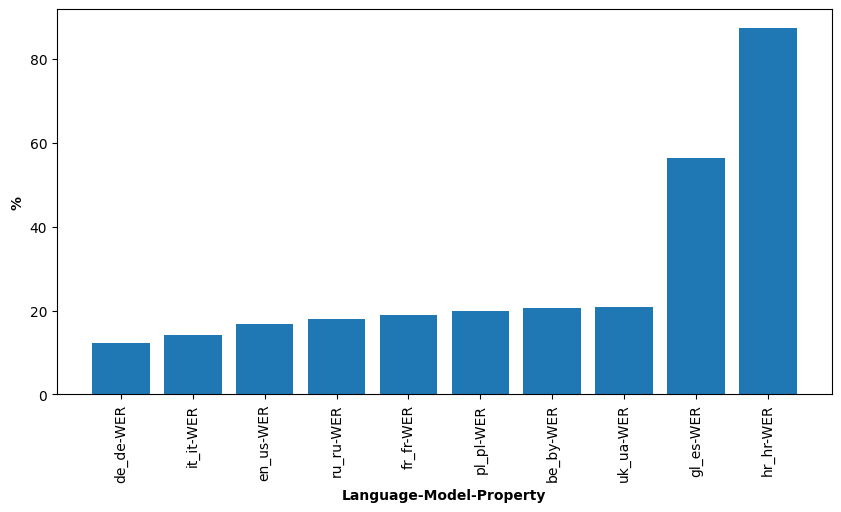

In [11]:
import matplotlib.pyplot as plt                                 
import numpy as np                                              
                                                                
data = results                                          
                                                                
properties = []                                                 
values = []                                                     
                                                                
for lang, categories in data.items():
    # print(lang, categories)                           
    for cat, props in categories.items():   
        # print(cat, props)            
        for prop, val in props.items():     
            if prop != "WER":
                continue
            properties.append(f"{lang}-{prop}")           
            values.append(val)                                  

combined = sorted(list(zip(values, properties)))
values, properties = zip(*combined)

# set figure size                                               
plt.figure(figsize=(10, 5))                                     
                                                                
# create a bar chart                                            
plt.bar(properties, values)                                     
                                                                
# rotate x-axis labels if they overlap                          
plt.xticks(rotation=90)                                         
                                                                
# add labels                                                    
plt.xlabel('Language-Model-Property', fontweight ='bold')    
plt.ylabel('%', fontweight ='bold')                        
                                                                
# show the plot                                                 
plt.show()                                                      
